<Figure size 1200x600 with 0 Axes>

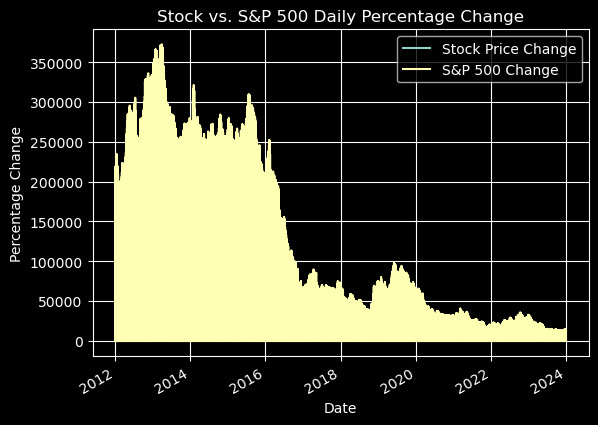

                          Symbol  Adj Close      Close       High        Low  \
Date                                                                           
2012-01-03 00:00:00+00:00      A  23.328583  26.094421  26.459227  25.565092   
2012-01-03 00:00:00+00:00   AAPL  12.388998  14.686786  14.732143  14.607143   
2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832  26.897589   
2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000  12.370000   
2012-01-03 00:00:00+00:00    ACN  41.785805  52.950001  54.090000  52.919998   

                                Open       Volume  Price Change  SP500 Change  \
Date                                                                            
2012-01-03 00:00:00+00:00  25.636623    4156394.0           NaN           NaN   
2012-01-03 00:00:00+00:00  14.621429  302220800.0           NaN    -46.893482   
2012-01-03 00:00:00+00:00  27.147083   17693206.0           NaN     68.303260   
2012-01-03 00:00:00+00:00  12.5966

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
df = pd.read_csv('/users/hm4th/desktop/sp500data.csv', parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily percentage change for the stock and the S&P 500 index
df['Price Change'] = df.groupby('Symbol')['Adj Close'].pct_change() * 100
df['SP500 Change'] = df['Adj Close'].pct_change() * 100  # Assuming 'Adj Close' represents the S&P 500 index for simplicity

# Label performance relative to the S&P 500
df['Performance Label'] = df.apply(
    lambda row: 'Outperform' if row['Price Change'] > row['SP500 Change'] else 'Underperform', axis=1
)

# Save the DataFrame with new columns to a CSV
df.to_csv('/users/hm4th/desktop/processed_sp500data.csv')

# Plotting for visualization
plt.figure(figsize=(12, 6))
df[['Price Change', 'SP500 Change']].plot()
plt.title('Stock vs. S&P 500 Daily Percentage Change')
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.legend(['Stock Price Change', 'S&P 500 Change'])
plt.grid(True)
plt.show()

# Print the first few rows of the processed DataFrame
print(df.head())



In [68]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Load the existing sp500data.csv
sp500_data_path = '/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv'
df = pd.read_csv(sp500_data_path, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Define the financial metrics to gather
def fetch_additional_metrics(ticker):
    """
    Fetch additional financial metrics for a given ticker using yfinance.
    """
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        return {
            'DE Ratio': info.get('debtToEquity', None),
            'Trailing P/E': info.get('trailingPE', None),
            'Price/Sales': info.get('priceToSalesTrailing12Months', None),
            'Price/Book': info.get('priceToBook', None),
            'Profit Margin': info.get('profitMargins', None),
            'Operating Margin': info.get('operatingMargins', None),
            'Return on Assets': info.get('returnOnAssets', None),
            'Return on Equity': info.get('returnOnEquity', None),
            'Revenue Per Share': info.get('revenuePerShare', None),
            'Market Cap': info.get('marketCap', None),
            'Enterprise Value': info.get('enterpriseValue', None),
            'Forward P/E': info.get('forwardPE', None),
            'PEG Ratio': info.get('pegRatio', None),
            'Enterprise Value/Revenue': info.get('enterpriseToRevenue', None),
            'Enterprise Value/EBITDA': info.get('enterpriseToEbitda', None),
            'Revenue': info.get('totalRevenue', None),
            'Gross Profit': info.get('grossProfits', None),
            'EBITDA': info.get('ebitda', None),
            'Net Income Avl to Common': info.get('netIncomeToCommon', None),
            'Diluted EPS': info.get('trailingEps', None),
            'Earnings Growth': info.get('earningsGrowth', None),
            'Revenue Growth': info.get('revenueGrowth', None),
            'Total Cash': info.get('totalCash', None),
            'Total Cash Per Share': info.get('totalCashPerShare', None),
            'Total Debt': info.get('totalDebt', None),
            'Current Ratio': info.get('currentRatio', None),
            'Book Value Per Share': info.get('bookValue', None),
            'Cash Flow': info.get('operatingCashflow', None),
            'Beta': info.get('beta', None),
            'Held by Insiders': info.get('heldPercentInsiders', None),
            'Held by Institutions': info.get('heldPercentInstitutions', None),
            'Shares Short': info.get('sharesShort', None),
            'Short Ratio': info.get('shortRatio', None),
            'Short % of Float': info.get('shortPercentOfFloat', None),
        }
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")
        return {}

# Fetch metrics for each symbol in the dataset
additional_metrics = []
symbols = df['Symbol'].unique()

print("Fetching additional metrics. This might take some time...")
for symbol in symbols:
    metrics = fetch_additional_metrics(symbol)
    metrics['Symbol'] = symbol
    additional_metrics.append(metrics)

# Convert the collected metrics to a DataFrame
metrics_df = pd.DataFrame(additional_metrics)

# Merge the additional metrics with the original dataset
df = df.reset_index()
merged_df = pd.merge(df, metrics_df, on='Symbol', how='left')

# Add labels and performance metrics
merged_df['Price Change'] = merged_df.groupby('Symbol')['Adj Close'].pct_change() * 100
merged_df['SP500 Change'] = merged_df['Adj Close'].pct_change() * 100  # Replace with SP500 column if needed
merged_df['Performance Label'] = merged_df.apply(
    lambda row: 'Outperform' if row['Price Change'] > row['SP500 Change'] else 'Underperform',
    axis=1
)

# Save the updated DataFrame to a new CSV
output_path = '/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv'
merged_df.to_csv(output_path, index=False)

print(f"Processed data with additional metrics saved to {output_path}")
print(merged_df.head())

Fetching additional metrics. This might take some time...
Failed to fetch data for AJG: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=30)
Failed to fetch data for AKAM: HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Read timed out. (read timeout=30)
Processed data with additional metrics saved to /users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv
                       Date Symbol  Adj Close      Close       High  \
0 2012-01-03 00:00:00+00:00      A  23.328588  26.094421  26.459227   
1 2012-01-03 00:00:00+00:00   AAPL  12.388997  14.686786  14.732143   
2 2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832   
3 2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000   
4 2012-01-03 00:00:00+00:00    ACN  41.785778  52.950001  54.090000   

         Low       Open       Volume  DE Ratio  Trailing P/E  ...  \
0  25.565092  25.636623    4156394.0       NaN     33.860360  .

/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/2345541498.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0}).astype(int)


Training Accuracy: 69.00%
Test Accuracy: 72.50%


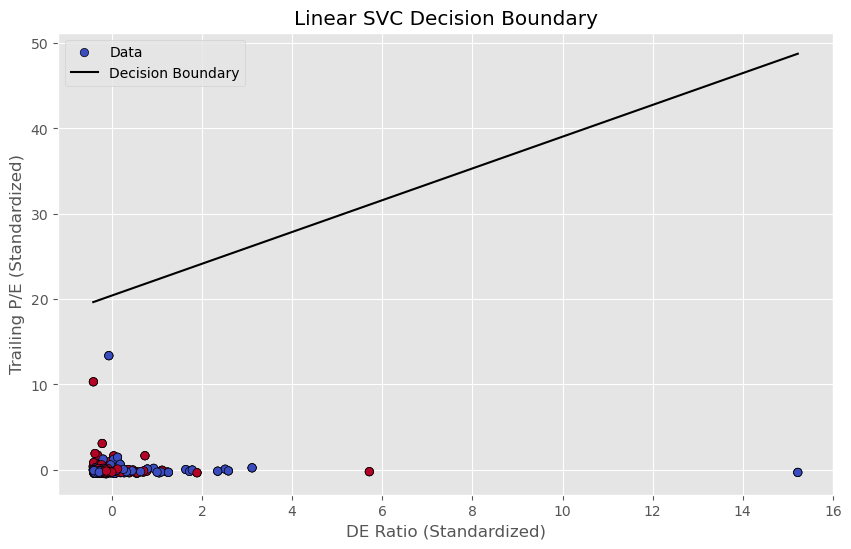

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC  # Faster than SVC(kernel="linear")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import style

style.use("ggplot")

# Load processed data
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Convert the performance label to numerical values
data_df["Performance Label"] = (
    data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0}).astype(int)
)

# Function to build the dataset for machine learning
def Build_Data_Set(features=["DE Ratio", "Trailing P/E"], max_rows=1000):
    # Drop rows with missing values
    filtered_df = data_df.dropna(subset=features + ["Performance Label"]).head(max_rows)
    
    # Select features (X) and target (y)
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].values
    
    return X, y

# Function to perform analysis using Linear SVC
def Analysis():
    # Build the dataset
    X, y = Build_Data_Set()
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Linear SVC (faster alternative to SVC)
    clf = LinearSVC(C=1.0, max_iter=100, random_state=42)  # Reduced max_iter for speed
    clf.fit(X_train, y_train)
    
    # Print accuracy
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Plot the decision boundary (optional, can be skipped for speed)
    if X.shape[1] >= 2:
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        yy = a * xx - clf.intercept_[0] / w[1]
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", label="Data")
        plt.plot(xx, yy, "k-", label="Decision Boundary")
        plt.xlabel("DE Ratio (Standardized)")
        plt.ylabel("Trailing P/E (Standardized)")
        plt.title("Linear SVC Decision Boundary")
        plt.legend()
        plt.show()

# Run the analysis
Analysis()

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC  # Faster alternative to SVC(kernel="linear")
from sklearn.model_selection import KFold  # For cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

# Define the features to use for training
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'Enterprise Value/Revenue',
    'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA',
    'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth',
    'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio',
    'Book Value Per Share', 'Cash Flow', 'Beta', 'Held by Insiders',
    'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Load and preprocess the data
def Build_Data_Set():
    # Load the dataset
    data_df = pd.read_csv("/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv")
    
    # Drop rows with missing values in selected features or target
    data_df = data_df.dropna(subset=FEATURES + ["Performance Label"])
    
    # Shuffle the rows for randomness
    data_df = data_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Convert "Performance Label" to binary values
    data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0}).astype(int)
    
    # Select features (X) and target (y)
    X = data_df[FEATURES].values
    y = data_df["Performance Label"].values
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

# Cross-validation analysis function
def Analysis():
    # Build the dataset
    X, y = Build_Data_Set()
    
    # Use K-Fold cross-validation for better testing
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    
    fold_accuracies = []
    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train Linear SVC (faster alternative to SVC(kernel="linear"))
        clf = LinearSVC(C=1.0, max_iter=1000, random_state=42)
        clf.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy * 100)
    
    # Print average accuracy across folds
    print(f"Cross-Validation Accuracy (Average): {np.mean(fold_accuracies):.2f}%")
    print(f"Cross-Validation Accuracies (Folds): {fold_accuracies}")
    
    # (Optional) Plot decision boundary for 2 features
    if len(FEATURES) == 2:
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        yy = a * xx - clf.intercept_[0] / w[1]
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", label="Data")
        plt.plot(xx, yy, "k-", label="Decision Boundary")
        plt.xlabel(FEATURES[0])
        plt.ylabel(FEATURES[1])
        plt.title("Linear SVC Decision Boundary")
        plt.legend()
        plt.show()

# Run the analysis
Analysis()


/Library/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_22279/1508805664.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0}).astype(int)


Cross-Validation Accuracy (Average): 67.48%
Cross-Validation Accuracies (Folds): [67.27888636002753, 67.58550029867449, 67.5061058139447, 67.56206002223045]


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/2083466718.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0})


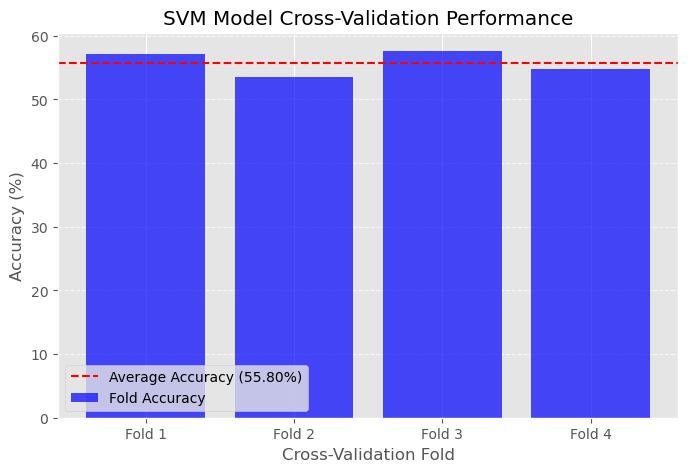

Cross-Validation Accuracy (Average): 55.80%
Cross-Validation Accuracies (Folds): [57.199999999999996, 53.6, 57.599999999999994, 54.800000000000004]


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/merged_processed_data.csv"
data_df = pd.read_csv(data_file)

# Ensure 'Performance Label' is numeric
data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0})

# Drop rows with NaN in critical columns
data_df = data_df.dropna(subset=["Price Change", "Performance Label"])

# Features to use
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E',
    'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue',
    'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS',
    'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Function to preprocess dataset
def Build_Data_Set(features=FEATURES, max_rows=1000):
    imputer = SimpleImputer(strategy="mean")  # Handle missing values
    scaler = StandardScaler()  # Standardization

    # Filter dataset
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)

    # Select features, labels, and additional metrics
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].astype(int).values  
    Z = filtered_df[["Price Change"]].values  

    # Apply imputation & scaling
    X = imputer.fit_transform(X)
    X = scaler.fit_transform(X)

    return X, y, Z

# Perform analysis using Linear SVC
def SVM_Analysis():
    X, y, Z = Build_Data_Set()

    # Initialize StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Linear SVC
        clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
        clf.fit(X_train, y_train)

        # Store accuracy
        fold_accuracy = clf.score(X_test, y_test) * 100
        accuracies.append(fold_accuracy)

    # Compute the average accuracy
    avg_accuracy = np.mean(accuracies)

    # Visualization
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, 5), accuracies, color='blue', alpha=0.7, label="Fold Accuracy")
    plt.axhline(y=avg_accuracy, color='red', linestyle='dashed', label=f"Average Accuracy ({avg_accuracy:.2f}%)")

    # Labels and title
    plt.xlabel("Cross-Validation Fold")
    plt.ylabel("Accuracy (%)")
    plt.title("SVM Model Cross-Validation Performance")
    plt.xticks(range(1, 5), labels=[f"Fold {i}" for i in range(1, 5)])
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

    # Print results
    print(f"Cross-Validation Accuracy (Average): {avg_accuracy:.2f}%")
    print(f"Cross-Validation Accuracies (Folds): {accuracies}")

# Run the SVM analysis and visualization
SVM_Analysis()


In [43]:
import pandas as pd

# 📌 Load datasets
features_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_features_updated.csv"
sp500_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data.csv"

features_df = pd.read_csv(features_file)
sp500_df = pd.read_csv(sp500_file)

# 📌 Print dataset shapes
print(f"🔹 Features Dataset Shape: {features_df.shape}")
print(f"🔹 SP500 Dataset Shape: {sp500_df.shape}")

# 📌 Ensure 'Symbol' & 'Date' exist in `sp500_df`
if "Symbol" not in sp500_df.columns or "Date" not in sp500_df.columns:
    raise ValueError("⚠️ Missing 'Symbol' or 'Date' in processed_sp500data.csv.")

# 📌 If 'Symbol' and 'Date' are missing in features_df, add them from sp500_df
if "Symbol" not in features_df.columns or "Date" not in features_df.columns:
    print("⚠️ 'Symbol' or 'Date' is missing in processed_features.csv. Adding them from sp500_df.")

    # Ensure length matches
    min_length = min(len(features_df), len(sp500_df))
    features_df = features_df.iloc[:min_length].copy()
    sp500_df = sp500_df.iloc[:min_length].copy()

    # Add "Symbol" & "Date" to features dataset
    features_df.insert(0, "Symbol", sp500_df["Symbol"].values[:len(features_df)])
    features_df.insert(1, "Date", sp500_df["Date"].values[:len(features_df)])

# 📌 Merge datasets based on "Symbol" & "Date"
merged_df = pd.merge(
    features_df,  # Features dataset (now with "Symbol" & "Date")
    sp500_df[['Symbol', 'Date', 'Performance Label', 'Price Change']],  # Only necessary columns
    on=['Symbol', 'Date'],
    how='inner'
)

# 📌 Save the merged dataset
merged_file = "/users/hm4th/desktop/SP500-Prediction-ML/merged_processed_data.csv"
merged_df.to_csv(merged_file, index=False)
print(f"✅ Merged dataset saved to: {merged_file}")

# 📌 Ensure "Performance Label" exists in the merged dataset
if "Performance Label" not in merged_df.columns:
    raise ValueError("⚠️ 'Performance Label' is missing after merging! Check the data.")

print("✅ Merging Successful! Final dataset shape:", merged_df.shape)


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/1110346081.py:7: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv(features_file)


🔹 Features Dataset Shape: (1447273, 34)
🔹 SP500 Dataset Shape: (12072, 11)
✅ Merged dataset saved to: /users/hm4th/desktop/SP500-Prediction-ML/merged_processed_data.csv
✅ Merging Successful! Final dataset shape: (12072, 36)


In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import style

style.use("ggplot")

# Define features to use
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio', 'Enterprise Value/Revenue',
    'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common',
    'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Load the dataset
data_file = "/users/hm4th/desktop/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Convert "Performance Label" to numerical values
data_df["Performance Label"] = (
    data_df["Performance Label"]
    .replace({"Outperform": 1, "Underperform": 0})
    .astype(int)
)

# Function to build the dataset for machine learning
def Build_Data_Set(features=FEATURES, max_rows=1000):
    # Handle missing values using imputation
    imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean

    # Ensure all necessary columns exist
    missing_columns = [col for col in features if col not in data_df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in dataset: {missing_columns}")

    # Filter rows with non-null Performance Label
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)
    if filtered_df.empty:
        raise ValueError("The dataset is empty after filtering. Check data or consider imputation.")

    # Select features (X) and target (y)
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].values

    # Apply imputation to features
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Function to perform analysis using Linear SVC
def Analysis():
    try:
        # Build the dataset
        X, y = Build_Data_Set()
        
        # Initialize StratifiedKFold for cross-validation
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        accuracies = []
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Train Linear SVC (faster alternative to SVC)
            clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
            clf.fit(X_train, y_train)
            
            # Evaluate and store the accuracy for this fold
            fold_accuracy = clf.score(X_test, y_test) * 100
            accuracies.append(fold_accuracy)
        
        # Print average accuracy and per-fold accuracy
        avg_accuracy = np.mean(accuracies)
        print(f"Cross-Validation Accuracy (Average): {avg_accuracy:.2f}%")
        print(f"Cross-Validation Accuracies (Folds): {accuracies}")
        
    except ValueError as e:
        print(f"Error: {e}")

# Run the analysis
Analysis()


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_22279/2390959235.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Outperform": 1, "Underperform": 0})


Cross-Validation Accuracy (Average): 72.20%
Cross-Validation Accuracies (Folds): [72.0, 73.6, 70.8, 72.39999999999999]


/Library/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [12]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import style

style.use("ggplot")

# Define features to use
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio', 'Enterprise Value/Revenue',
    'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common',
    'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Load the dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Convert "Performance Label" to numerical values
data_df["Performance Label"] = (
    data_df["Performance Label"]
    .replace({"Outperform": 1, "Underperform": 0})
    .astype(int)
)

# Function to build the dataset for machine learning
def Build_Data_Set(features=FEATURES, max_rows=1000):
    # Handle missing values using imputation
    imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean

    # Ensure all necessary columns exist
    missing_columns = [col for col in features if col not in data_df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in dataset: {missing_columns}")

    # Filter rows with non-null Performance Label
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)
    if filtered_df.empty:
        raise ValueError("The dataset is empty after filtering. Check data or consider imputation.")

    # Select features (X) and target (y)
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].values

    # Apply imputation to features
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Function to perform analysis using Linear SVC
def Analysis():
    try:
        # Build the dataset
        X, y = Build_Data_Set()
        
        # Initialize StratifiedKFold for cross-validation
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        accuracies = []
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Train Linear SVC (faster alternative to SVC)
            clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
            clf.fit(X_train, y_train)
            
            # Evaluate and store the accuracy for this fold
            fold_accuracy = clf.score(X_test, y_test) * 100
            accuracies.append(fold_accuracy)
        
        # Print average accuracy and per-fold accuracy
        avg_accuracy = np.mean(accuracies)
        print(f"Cross-Validation Accuracy (Average): {avg_accuracy:.2f}%")
        print(f"Cross-Validation Accuracies (Folds): {accuracies}")
        
    except ValueError as e:
        print(f"Error: {e}")

# Run the analysis
Analysis()


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_22279/2390959235.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Outperform": 1, "Underperform": 0})


Cross-Validation Accuracy (Average): 72.20%
Cross-Validation Accuracies (Folds): [72.0, 73.6, 70.8, 72.39999999999999]


/Library/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [12]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/2368030064.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0}).astype(int)
/Library/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [12]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


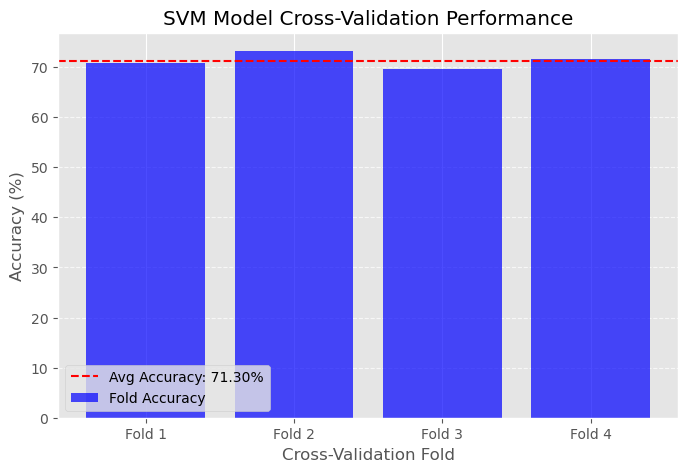

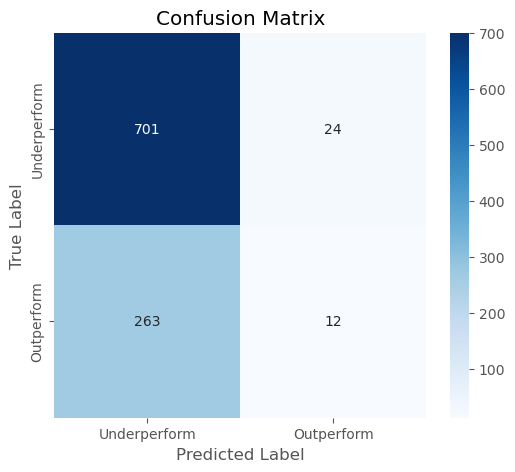

ValueError: All arrays must be of the same length

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Convert "Performance Label" to numerical values
data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0}).astype(int)

# Define features
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio', 'Enterprise Value/Revenue',
    'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common',
    'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Function to preprocess dataset
def Build_Data_Set(features=FEATURES, max_rows=1000):
    imputer = SimpleImputer(strategy="mean")  # Handle missing values
    scaler = StandardScaler()  # Standardization

    # Filter dataset
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)

    # Select features, labels
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].values  

    # Apply imputation & scaling
    X = imputer.fit_transform(X)
    X = scaler.fit_transform(X)

    return X, y, filtered_df

# Perform SVM and visualize results
def SVM_Analysis():
    X, y, filtered_df = Build_Data_Set()
    
    # Initialize StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    accuracies = []
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Linear SVC
        clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
        clf.fit(X_train, y_train)

        # Predictions
        y_pred = clf.predict(X_test)

        # Store results
        fold_accuracy = clf.score(X_test, y_test) * 100
        accuracies.append(fold_accuracy)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    # Compute the average accuracy
    avg_accuracy = np.mean(accuracies)

    # **1️⃣ Cross-Validation Accuracy Visualization**
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, 5), accuracies, color='blue', alpha=0.7, label="Fold Accuracy")
    plt.axhline(y=avg_accuracy, color='red', linestyle='dashed', label=f"Avg Accuracy: {avg_accuracy:.2f}%")

    plt.xlabel("Cross-Validation Fold")
    plt.ylabel("Accuracy (%)")
    plt.title("SVM Model Cross-Validation Performance")
    plt.xticks(range(1, 5), labels=[f"Fold {i}" for i in range(1, 5)])
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # **2️⃣ Confusion Matrix Visualization**
    cm = confusion_matrix(y_true_all, y_pred_all)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Underperform", "Outperform"], yticklabels=["Underperform", "Outperform"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # **3️⃣ Feature Importance (if coefficients are available)**
    if hasattr(clf, "coef_"):
        importance = np.abs(clf.coef_).mean(axis=0)
        feature_importance = pd.DataFrame({"Feature": FEATURES, "Importance": importance})
        feature_importance = feature_importance.sort_values(by="Importance", ascending=False).head(10)

        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
        plt.xlabel("Coefficient Magnitude")
        plt.ylabel("Feature")
        plt.title("Top 10 Important Features in SVM Model")
        plt.show()

    # **4️⃣ Print Classification Report**
    print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))

    print(f"\nCross-Validation Accuracy (Average): {avg_accuracy:.2f}%")
    print(f"Cross-Validation Accuracies (Folds): {accuracies}")

# Run the analysis and visualization
SVM_Analysis()


In [10]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import style

style.use("ggplot")

# Define Features for Analysis
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio', 'Enterprise Value/Revenue',
    'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common',
    'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Load the dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Convert "Performance Label" to numerical values
data_df["Performance Label"] = (
    data_df["Performance Label"]
    .replace({"Outperform": 1, "Underperform": 0})
    .astype(int)
)

# Function to build the dataset for machine learning
def Build_Data_Set(features=FEATURES, max_rows=5000):
    # Handle missing values - Replace N/A and NaN with a large negative number (-999)
    data_df.replace(["N/A", np.nan], -999, inplace=True)

    # Check for missing feature columns
    missing_columns = [col for col in features if col not in data_df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in dataset: {missing_columns}")

    # Filter rows with non-null Performance Label
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)
    if filtered_df.empty:
        raise ValueError("The dataset is empty after filtering. Check data or consider imputation.")

    # Select features (X) and target (y)
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].values

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Function to perform back-testing using Linear SVC
def Backtest_Analysis():
    try:
        # Build the dataset
        X, y = Build_Data_Set()
        
        # Set test size for back-testing
        test_size = 1000
        X_train, X_test = X[:-test_size], X[-test_size:]
        y_train, y_test = y[:-test_size], y[-test_size:]

        # Train Linear SVC (faster than SVC with linear kernel)
        clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
        clf.fit(X_train, y_train)

        # Back-test Performance
        correct_count = 0
        performance_diff = []

        for i in range(test_size):
            predicted = clf.predict([X_test[i]])[0]
            actual = y_test[i]
            performance_diff.append(abs(predicted - actual))  # Measure degree of correctness

            if predicted == actual:
                correct_count += 1

        # Compute Back-Test Results
        accuracy = (correct_count / test_size) * 100
        avg_performance_deviation = np.mean(performance_diff)

        print(f"Back-Test Accuracy: {accuracy:.2f}%")
        print(f"Average Degree of Correctness (Lower is better): {avg_performance_deviation:.3f}")

    except ValueError as e:
        print(f"Error: {e}")

# Run the Back-Test Analysis
Backtest_Analysis()


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_22279/1978992072.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Outperform": 1, "Underperform": 0})


Back-Test Accuracy: 65.40%
Average Degree of Correctness (Lower is better): 0.346


In [14]:
import numpy as np
import pandas as pd

# Load the dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Verify necessary columns exist
if 'Adj Close' in data_df.columns and 'SP500' in data_df.columns:
    # Calculate daily percentage change
    data_df['Price Change'] = data_df.groupby('Symbol')['Adj Close'].pct_change() * 100
    data_df['SP500 Change'] = data_df['SP500'].pct_change() * 100

    # Fill NaN values with 0 instead of -999 for more realistic data
    data_df.fillna(0, inplace=True)

    # Save the updated dataset
    updated_file = "/users/hm4th/desktop/processed_sp500data_with_metrics_fixed.csv"
    data_df.to_csv(updated_file, index=False)

    print(f"Updated dataset saved to {updated_file}")
else:
    print("Required columns ('Adj Close' and/or 'SP500') are missing.")


Required columns ('Adj Close' and/or 'SP500') are missing.


In [15]:
import pandas as pd

# Load the dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
data_df = pd.read_csv(data_file)

# Print the column names
print(data_df.columns)


Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book',
       'Profit Margin', 'Operating Margin', 'Return on Assets',
       'Return on Equity', 'Revenue Per Share', 'Market Cap',
       'Enterprise Value', 'Forward P/E', 'PEG Ratio',
       'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue',
       'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS',
       'Earnings Growth', 'Revenue Growth', 'Total Cash',
       'Total Cash Per Share', 'Total Debt', 'Current Ratio',
       'Book Value Per Share', 'Cash Flow', 'Beta', 'Held by Insiders',
       'Held by Institutions', 'Shares Short', 'Short Ratio',
       'Short % of Float', 'Price Change', 'SP500 Change',
       'Performance Label'],
      dtype='object')


In [3]:
import pandas as pd

# Load the main dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/sp500_data.csv"
data_df = pd.read_csv(data_file)

# Load the S&P 500 dataset
sp500_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"  # Replace with the correct path
sp500_df = pd.read_csv(sp500_file)

# Convert 'Date' columns to a common format
data_df["Date"] = pd.to_datetime(data_df["Date"])  # Convert to datetime
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"]).dt.tz_localize(None)  # Remove timezone

# Merge the datasets on 'Date'
data_df = pd.merge(
    data_df,
    sp500_df[["Date", "Adj Close"]].rename(columns={"Adj Close": "SP500"}),
    on="Date",
    how="left"
)

# Save the updated dataset
updated_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"
data_df.to_csv(updated_file, index=False)

print(f"Dataset successfully updated and saved to {updated_file}")



Dataset successfully updated and saved to /users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv


In [ ]:
import pandas as pd

# File paths
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
sp500_file = "/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv"
updated_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"

# Optimized dtype specifications
data_dtype = {
    "Symbol": "category",
    "DE Ratio": "float32",
    "Trailing P/E": "float32",
    "Price/Sales": "float32",
    "Price/Book": "float32",
    "Profit Margin": "float32",
    "Operating Margin": "float32",
    "Return on Assets": "float32",
    "Return on Equity": "float32",
    "Revenue Per Share": "float32",
    "Market Cap": "float64",
    "Enterprise Value": "float64"
}

sp500_dtype = {
    "Adj Close": "float32"  # Only specify non-datetime columns here
}

# Load datasets with optimized dtypes
data_df = pd.read_csv(data_file, parse_dates=["Date"], dtype=data_dtype, low_memory=False)
sp500_df = pd.read_csv(sp500_file, usecols=["Date", "Adj Close"], parse_dates=["Date"], dtype=sp500_dtype, low_memory=False)

# Drop rows with invalid date values (if any)
data_df.dropna(subset=["Date"], inplace=True)
sp500_df.dropna(subset=["Date"], inplace=True)

# Merge datasets using an efficient left join
data_df = data_df.merge(sp500_df.rename(columns={"Adj Close": "SP500"}), on="Date", how="left")

# Save the optimized dataset
data_df.to_csv(updated_file, index=False)

print(f"Dataset successfully updated and saved to {updated_file}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import style

style.use("ggplot")

# Load the updated dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"
data_df = pd.read_csv(data_file)

# Ensure 'Symbol' column exists
if "Symbol" not in data_df.columns:
    raise ValueError("Error: The dataset is missing the 'Symbol' column. Ensure the data processing step includes it.")

# Recalculate Price Change and SP500 Change
data_df["Price Change"] = data_df.groupby("Symbol")["Adj Close"].pct_change() * 100
data_df["SP500 Change"] = data_df["SP500"].pct_change() * 100

# Drop rows with NaN in critical columns
data_df = data_df.dropna(subset=["Price Change", "SP500 Change", "Performance Label"])

# Define features for the model
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio',
    'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue',
    'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS',
    'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Build the dataset
def Build_Data_Set(features=FEATURES, max_rows=1000):
    imputer = SimpleImputer(strategy="mean")  # Handle missing values

    # Ensure all necessary columns exist
    missing_columns = [col for col in features if col not in data_df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in dataset: {missing_columns}")

    # Filter rows with non-null Performance Label
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)

    # Select features (X) and target (y)
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].astype(int).values

    # Apply imputation to features
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Perform analysis using Linear SVC
def Analysis():
    try:
        X, y = Build_Data_Set()

        # Initialize StratifiedKFold for cross-validation
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        accuracies = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Train Linear SVC
            clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
            clf.fit(X_train, y_train)

            # Evaluate and store the accuracy for this fold
            fold_accuracy = clf.score(X_test, y_test) * 100
            accuracies.append(fold_accuracy)

        # Print average accuracy and per-fold accuracy
        avg_accuracy = np.mean(accuracies)
        print(f"Cross-Validation Accuracy (Average): {avg_accuracy:.2f}%")
        print(f"Cross-Validation Accuracies (Folds): {accuracies}")

    except ValueError as e:
        print(f"Error: {e}")

# Run the analysis
Analysis()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import matplotlib.style as style

# Set plotting style
style.use("ggplot")

# File paths
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
sp500_file = "/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv"
updated_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"

# Optimized dtype specifications
data_dtype = {
    "Symbol": "category",
    "DE Ratio": "float32",
    "Trailing P/E": "float32",
    "Price/Sales": "float32",
    "Price/Book": "float32",
    "Profit Margin": "float32",
    "Operating Margin": "float32",
    "Return on Assets": "float32",
    "Return on Equity": "float32",
    "Revenue Per Share": "float32",
    "Market Cap": "float64",
    "Enterprise Value": "float64"
}

sp500_dtype = {
    "Adj Close": "float32"  # Only specify non-datetime columns here
}

# Load datasets with optimized dtypes
data_df = pd.read_csv(data_file, parse_dates=["Date"], dtype=data_dtype, low_memory=False)
sp500_df = pd.read_csv(sp500_file, usecols=["Date", "Adj Close"], parse_dates=["Date"], dtype=sp500_dtype, low_memory=False)

# Drop rows with invalid date values (if any)
data_df.dropna(subset=["Date"], inplace=True)
sp500_df.dropna(subset=["Date"], inplace=True)

# Merge datasets using an efficient left join
data_df = data_df.merge(sp500_df.rename(columns={"Adj Close": "SP500"}), on="Date", how="left")

# Save the optimized dataset
data_df.to_csv(updated_file, index=False)

print(f"Dataset successfully updated and saved to {updated_file}")

# Load the updated dataset for further processing
data_df = pd.read_csv(updated_file, parse_dates=["Date"], low_memory=False)

# Ensure 'Symbol' column exists
if 'Symbol' not in data_df.columns:
    raise ValueError("Error: The dataset is missing the 'Symbol' column. Ensure the data processing step includes it.")

# Recalculate Price Change and SP500 Change
data_df["Price Change"] = data_df.groupby("Symbol")['Adj Close'].pct_change() * 100
data_df["SP500 Change"] = data_df["SP500"].pct_change() * 100

# Drop rows with NaN in critical columns
data_df = data_df.dropna(subset=["Price Change", "SP500 Change", "Performance Label"])

# Define features for the model
FEATURES = ["Price Change", "SP500 Change"]  # Add relevant features here

# Example: Prepare data for machine learning
X = data_df[FEATURES]
y = data_df["Performance Label"]

# Handle missing values (if any)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LinearSVC model
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import matplotlib.style as style

# Set plotting style
style.use("ggplot")

In [2]:
# File paths
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_metrics.csv"
sp500_file = "/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv"
updated_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"

# Optimized dtype specifications
data_dtype = {
    "Symbol": "category",
    "DE Ratio": "float32",
    "Trailing P/E": "float32",
    "Price/Sales": "float32",
    "Price/Book": "float32",
    "Profit Margin": "float32",
    "Operating Margin": "float32",
    "Return on Assets": "float32",
    "Return on Equity": "float32",
    "Revenue Per Share": "float32",
    "Market Cap": "float64",
    "Enterprise Value": "float64"
}

sp500_dtype = {
    "Adj Close": "float32"  # Only specify non-datetime columns here
}

In [3]:
# Load datasets with optimized dtypes
data_df = pd.read_csv(data_file, parse_dates=["Date"], dtype=data_dtype, low_memory=False)
sp500_df = pd.read_csv(sp500_file, usecols=["Date", "Adj Close"], parse_dates=["Date"], dtype=sp500_dtype, low_memory=False)

# Drop rows with invalid date values (if any)
data_df.dropna(subset=["Date"], inplace=True)
sp500_df.dropna(subset=["Date"], inplace=True)

# Check the first few rows of each dataset
print("Data DataFrame:")
print(data_df.head())

print("\nS&P 500 DataFrame:")
print(sp500_df.head())

Data DataFrame:
                       Date Symbol  Adj Close      Close       High  \
0 2012-01-03 00:00:00+00:00      A  23.328583  26.094421  26.459227   
1 2012-01-03 00:00:00+00:00   AAPL  12.388998  14.686786  14.732143   
2 2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832   
3 2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000   
4 2012-01-03 00:00:00+00:00    ACN  41.785805  52.950001  54.090000   

         Low       Open       Volume    DE Ratio  Trailing P/E  ...  \
0  25.565092  25.636623    4156394.0         NaN     34.108109  ...   
1  14.607143  14.621429  302220800.0  209.059006     36.641449  ...   
2  26.897589  27.147083   17693206.0   37.589001     16.365183  ...   
3  12.370000  12.596667    2734200.0   12.243000      6.225503  ...   
4  52.919998  53.919998    5309600.0   14.127000     30.403524  ...   

      Cash Flow   Beta  Held by Insiders  Held by Institutions  Shares Short  \
0           NaN    NaN               NaN          

In [4]:
# Load datasets with optimized dtypes
data_df = pd.read_csv(data_file, parse_dates=["Date"], dtype=data_dtype, low_memory=False)
sp500_df = pd.read_csv(sp500_file, usecols=["Date", "Adj Close"], parse_dates=["Date"], dtype=sp500_dtype, low_memory=False)

# Drop rows with invalid date values (if any)
data_df.dropna(subset=["Date"], inplace=True)
sp500_df.dropna(subset=["Date"], inplace=True)

# Check the first few rows of each dataset
print("Data DataFrame:")
print(data_df.head())

print("\nS&P 500 DataFrame:")
print(sp500_df.head())

Data DataFrame:
                       Date Symbol  Adj Close      Close       High  \
0 2012-01-03 00:00:00+00:00      A  23.328583  26.094421  26.459227   
1 2012-01-03 00:00:00+00:00   AAPL  12.388998  14.686786  14.732143   
2 2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832   
3 2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000   
4 2012-01-03 00:00:00+00:00    ACN  41.785805  52.950001  54.090000   

         Low       Open       Volume    DE Ratio  Trailing P/E  ...  \
0  25.565092  25.636623    4156394.0         NaN     34.108109  ...   
1  14.607143  14.621429  302220800.0  209.059006     36.641449  ...   
2  26.897589  27.147083   17693206.0   37.589001     16.365183  ...   
3  12.370000  12.596667    2734200.0   12.243000      6.225503  ...   
4  52.919998  53.919998    5309600.0   14.127000     30.403524  ...   

      Cash Flow   Beta  Held by Insiders  Held by Institutions  Shares Short  \
0           NaN    NaN               NaN          

In [5]:
# Save the optimized dataset
data_df.to_csv(updated_file, index=False)

print(f"Dataset successfully updated and saved to {updated_file}")

Dataset successfully updated and saved to /users/hm4th/desktop/processed_sp500data_with_sp500.csv


In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import style

style.use("ggplot")

# Load the dataset
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"
data_df = pd.read_csv(data_file)

# Ensure 'Symbol' column exists
if "Symbol" not in data_df.columns:
    raise ValueError("Error: The dataset is missing the 'Symbol' column.")

# Ensure 'SP500 Change' exists instead of 'SP500'
if "SP500 Change" not in data_df.columns:
    raise ValueError("Missing 'SP500 Change' column. Ensure your dataset includes it.")

# Convert 'Performance Label' to numerical values
data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0})

# Drop rows with NaN in critical columns
data_df = data_df.dropna(subset=["Price Change", "SP500 Change", "Performance Label"])

# Define features for the model
FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio',
    'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue',
    'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS',
    'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Build the dataset
def Build_Data_Set(features=FEATURES, max_rows=1000):
    imputer = SimpleImputer(strategy="mean")  # Handle missing values

    # Ensure all necessary columns exist
    missing_columns = [col for col in features if col not in data_df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in dataset: {missing_columns}")

    # Filter rows with non-null Performance Label
    filtered_df = data_df.dropna(subset=["Performance Label"]).head(max_rows)

    # Select features (X), target (y), and performance metrics (Z)
    X = filtered_df[features].values
    y = filtered_df["Performance Label"].astype(int).values  # Fix: Convert to integer
    Z = filtered_df[["Price Change", "SP500 Change"]].values  # Fixed to use "SP500 Change"

    # Apply imputation to features
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, Z

# Perform analysis using Linear SVC
def Analysis():
    try:
        X, y, Z = Build_Data_Set()

        # Initialize StratifiedKFold for cross-validation
        skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        accuracies = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Train Linear SVC
            clf = LinearSVC(C=1.0, max_iter=5000, random_state=42)
            clf.fit(X_train, y_train)

            # Evaluate and store the accuracy for this fold
            fold_accuracy = clf.score(X_test, y_test) * 100
            accuracies.append(fold_accuracy)

        # Print average accuracy and per-fold accuracy
        avg_accuracy = np.mean(accuracies)
        print(f"Cross-Validation Accuracy (Average): {avg_accuracy:.2f}%")
        print(f"Cross-Validation Accuracies (Folds): {accuracies}")

    except ValueError as e:
        print(f"Error: {e}")

# Run the analysis
Analysis()




/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_30834/2343003698.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df["Performance Label"] = data_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0})


Cross-Validation Accuracy (Average): 63.10%
Cross-Validation Accuracies (Folds): [63.6, 61.6, 63.2, 64.0]


/Library/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [12]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [12]:
import pandas as pd
import yfinance as yf
import time
import os

# Load the processed dataset to get stock tickers
data_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"

if not os.path.exists(data_file):
    raise FileNotFoundError(f"Dataset not found at {data_file}. Please ensure the file exists.")

data_df = pd.read_csv(data_file)

# Extract unique stock symbols
if "Symbol" not in data_df.columns:
    raise ValueError("Error: The dataset is missing the 'Symbol' column.")

tickers = data_df["Symbol"].unique().tolist()
print(f"Found {len(tickers)} unique tickers to fetch data for.")

# Define key statistics to extract
FEATURES = [
    "debtToEquity", "trailingPE", "priceToSalesTrailing12Months", "priceToBook",
    "profitMargins", "operatingMargins", "returnOnAssets", "returnOnEquity",
    "revenuePerShare", "marketCap", "enterpriseValue", "forwardPE", "pegRatio",
    "enterpriseToRevenue", "enterpriseToEbitda", "totalRevenue", "grossProfits",
    "ebitda", "netIncome", "dilutedEPS", "earningsGrowth", "revenueGrowth",
    "totalCash", "totalCashPerShare", "totalDebt", "currentRatio",
    "bookValue", "freeCashflow", "beta", "heldPercentInsiders",
    "heldPercentInstitutions", "shortRatio", "shortPercentOfFloat"
]

# Initialize a list to store stock data
data_list = []

# Fetch Yahoo Finance statistics for each stock
for ticker in tickers:
    try:
        print(f"Fetching data for {ticker}...")
        stock = yf.Ticker(ticker)
        info = stock.info

        # Extract relevant features
        stock_data = {feature: info.get(feature, "N/A") for feature in FEATURES}
        stock_data["Ticker"] = ticker  # Include stock ticker
        stock_data["Date"] = "N/A"  # Placeholder for no specific date
        stock_data["Unix"] = "N/A"  
        stock_data["Price"] = info.get("previousClose", "N/A")  # Latest close price
        stock_data["stock_p_change"] = "N/A"
        stock_data["SP500"] = "N/A"  
        stock_data["sp500_p_change"] = "N/A"
        stock_data["Difference"] = "N/A"
        stock_data["Status"] = "N/A"  # Placeholder since this is forward-looking

        # Append the data to the list
        data_list.append(stock_data)

        time.sleep(0.5)  # To avoid hitting rate limits

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        time.sleep(2)  # Pause and try the next one

# Convert list to DataFrame
df = pd.DataFrame(data_list)

# Save the updated dataset
output_file = "/users/hm4th/desktop/forward_sample_WITH_NA.csv"  # Save in the current directory
df.to_csv(output_file, index=False)

print(f"Dataset successfully updated and saved to {output_file}")


Found 498 unique tickers to fetch data for.
Fetching data for A...
Fetching data for AAPL...
Fetching data for ABT...
Fetching data for ACGL...
Fetching data for ACN...
Fetching data for ADBE...
Fetching data for ADI...
Fetching data for ADM...
Fetching data for ADP...
Fetching data for ADSK...
Fetching data for AEE...
Fetching data for AEP...
Fetching data for AES...
Fetching data for AFL...
Fetching data for AIG...
Fetching data for AIZ...
Fetching data for AJG...
Fetching data for AKAM...
Fetching data for ALB...
Fetching data for ALGN...
Fetching data for ALL...
Fetching data for AMAT...
Fetching data for AMD...
Fetching data for AME...
Fetching data for AMGN...
Fetching data for AMP...
Fetching data for AMT...
Fetching data for AMZN...
Fetching data for ANSS...
Fetching data for AON...
Fetching data for AOS...
Fetching data for APA...
Fetching data for APD...
Fetching data for APH...
Fetching data for APO...
Fetching data for APTV...
Fetching data for ARE...
Fetching data for ATO.

In [63]:
import numpy as np
import pandas as pd
from sklearn import svm, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import style

style.use("ggplot")

# Define feature set
ALL_FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio',
    'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue',
    'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS',
    'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]



# File paths
processed_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv"
forward_file = "/users/hm4th/desktop/SP500-Prediction-ML/forward_sample_WITH_NA.csv"

def Build_Data_Set():
    # Load dataset
    data_df = pd.read_csv(processed_file)
    
    # Show initial dataset structure
    print("Initial Dataset:")
    print(data_df.head())
    print(f"Columns: {list(data_df.columns)}\n")

    # Handle "Outperform" and "Underperform" labels
    data_df["Performance Label"] = (
        data_df["Performance Label"]
        .replace({"Underperform": 0, "Outperform": 1})
        .infer_objects(copy=False)
    )
    print("After Replacing 'Performance Label' Values:")
    print(data_df[["Performance Label"]].head())

    # Filter only features that exist in the dataset
    available_features = [feature for feature in ALL_FEATURES if feature in data_df.columns]

    if not available_features:
        raise ValueError("No valid features available in the dataset.")

    # Remove columns with all missing values
    available_features = [
        feature for feature in available_features if not data_df[feature].isna().all()
    ]

    if not available_features:
        raise ValueError("All available features contain only NaN values.")

    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    feature_data = imputer.fit_transform(data_df[available_features])

    # Convert back to DataFrame with correct column names
    feature_df = pd.DataFrame(feature_data, columns=available_features, index=data_df.index)

    # Show the processed feature DataFrame
    print("Processed Features:")
    print(feature_df.head())

    # Extract features (X) and target (y)
    X = feature_df.values
    y = data_df["Performance Label"].astype(int).values

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Stock & S&P 500 performance changes
    Z = np.array(data_df[["Price Change", "SP500 Change"]])

    # Optionally save the processed feature DataFrame for inspection
    feature_df.to_csv("/users/hm4th/desktop/processed_features.csv", index=False)
    print("Processed features saved to '/users/hm4th/desktop/processed_features.csv'")

    return X, y, Z, available_features



In [64]:
def Build_Data_Set():
    # Load dataset
    data_df = pd.read_csv(processed_file)
    
    # Show initial dataset structure
    print("Initial Dataset:")
    print(data_df.head())  # Display the first 5 rows of the dataset
    print(f"Columns: {list(data_df.columns)}\n")  # List all columns

    # Handle "Outperform" and "Underperform" labels
    data_df["Performance Label"] = (
        data_df["Performance Label"]
        .replace({"Underperform": 0, "Outperform": 1})
        .infer_objects(copy=False)
    )
    print("After Replacing 'Performance Label' Values:")
    print(data_df[["Performance Label"]].head())  # Display first few rows of the updated label column

    # Filter only features that exist in the dataset
    available_features = [feature for feature in ALL_FEATURES if feature in data_df.columns]

    if not available_features:
        raise ValueError("No valid features available in the dataset.")

    print(f"Available Features for Processing: {available_features}")

    # Remove columns with all missing values
    available_features = [
        feature for feature in available_features if not data_df[feature].isna().all()
    ]

    if not available_features:
        raise ValueError("All available features contain only NaN values.")

    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    feature_data = imputer.fit_transform(data_df[available_features])

    # Convert back to DataFrame with correct column names
    feature_df = pd.DataFrame(feature_data, columns=available_features, index=data_df.index)

    # Show the processed feature DataFrame
    print("\nProcessed Features:")
    print(feature_df.head())  # Display first few rows of the processed features

    # Extract features (X) and target (y)
    X = feature_df.values
    y = data_df["Performance Label"].astype(int).values

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Stock & S&P 500 performance changes
    Z = np.array(data_df[["Price Change", "SP500 Change"]])

    # Optionally save the processed feature DataFrame for inspection
    feature_df.to_csv("/users/hm4th/desktop/SP500-Prediction-ML/processed_features.csv", index=False)
    print("Processed features saved to '/users/hm4th/desktop/SP500-Prediction-ML/processed_features.csv'")

    return X, y, Z, available_features

# Call the function and capture the output
X, y, Z, available_features = Build_Data_Set()


Initial Dataset:
                        Date Symbol  Adj Close      Close       High  \
0  2012-01-03 00:00:00+00:00      A  23.328583  26.094421  26.459227   
1  2012-01-03 00:00:00+00:00   AAPL  12.388998  14.686786  14.732143   
2  2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832   
3  2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000   
4  2012-01-03 00:00:00+00:00    ACN  41.785805  52.950001  54.090000   

         Low       Open       Volume  DE Ratio  Trailing P/E  ...  \
0  25.565092  25.636623    4156394.0       NaN     34.108110  ...   
1  14.607143  14.621429  302220800.0   209.059     36.641450  ...   
2  26.897589  27.147083   17693206.0    37.589     16.365183  ...   
3  12.370000  12.596667    2734200.0    12.243      6.225503  ...   
4  52.919998  53.919998    5309600.0    14.127     30.403524  ...   

      Cash Flow   Beta  Held by Insiders  Held by Institutions  Shares Short  \
0           NaN    NaN               NaN               

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # ✅ Correct import for SimpleImputer
from matplotlib import style

style.use("ggplot")

# Define all possible features
ALL_FEATURES = [
    'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin',
    'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share',
    'Market Cap', 'Enterprise Value', 'Forward P/E', 'PEG Ratio',
    'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue',
    'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS',
    'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share',
    'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta',
    'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float'
]

# Load dataset and preprocess
def Build_Data_Set():
    # Load dataset
    data_df = pd.read_csv("/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data_with_sp500.csv")

    # Handle "Outperform" and "Underperform" labels
    data_df["Performance Label"] = (
        data_df["Performance Label"]
        .replace({"Underperform": 0, "Outperform": 1})
        .infer_objects(copy=False)
    )

    # **Filter only features that exist in the dataset**
    available_features = [feature for feature in ALL_FEATURES if feature in data_df.columns]

    # Warn if missing features
    missing_features = [feature for feature in ALL_FEATURES if feature not in available_features]
    if missing_features:
        print(f"Warning: The following features are missing and will be ignored: {missing_features}")

    # Handle missing values safely
    imputer = SimpleImputer(strategy="mean")  
    feature_data = imputer.fit_transform(data_df[available_features])  # Impute missing values

    # Convert back to DataFrame with correct column names
    feature_df = pd.DataFrame(feature_data, columns=available_features)

    # Extract features (X) and target (y)
    X = feature_df.values
    y = data_df["Performance Label"].astype(int).values

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Stock & S&P 500 performance changes
    Z = np.array(data_df[["Price Change", "SP500 Change"]])

    return X, y, Z, available_features

# Model Training & Backtesting
def Analysis():
    test_size = 500  # Use 500 stocks for testing
    invest_amount = 10000  # Fixed investment per trade
    total_invests = 0
    if_market = 0  # Market return
    if_strat = 0  # Strategy return

    # Load dataset
    X, y, Z, available_features = Build_Data_Set()

    # Ensure there are no NaN values before training
    if np.isnan(X).any() or np.isnan(y).any():
        raise ValueError("Dataset contains NaN values even after imputation!")

    # Train SVM model
    clf = svm.SVC(kernel="linear", C=1.0)
    clf.fit(X[:-test_size], y[:-test_size])

    # Track correct predictions & investments
    correct_count = 0

    for x in range(1, test_size + 1):
        prediction = clf.predict(X[-x].reshape(1, -1))[0]

        if prediction == y[-x]:
            correct_count += 1

        if prediction == 1:  # Predicting outperformance
            invest_return = invest_amount + (invest_amount * (Z[-x][0] / 100))
            market_return = invest_amount + (invest_amount * (Z[-x][1] / 100))
            total_invests += 1
            if_market += market_return
            if_strat += invest_return

    print(f"Model Accuracy: {(correct_count / test_size) * 100:.2f}%")
    print(f"Total Trades Made: {total_invests}")
    print(f"Strategy Return: ${if_strat:.2f}")
    print(f"Market Return: ${if_market:.2f}")

    # Compare returns
    compared = ((if_strat - if_market) / if_market) * 100
    print(f"Strategy beats market by {compared:.2f}%")

    # Load forward-looking data
    data_df = pd.read_csv("/users/hm4th/desktop/SP500-Prediction-ML/forward_sample_WITH_NA.csv")
    
    # Handle missing values in forward-looking data
    imputer = SimpleImputer(strategy="mean")  
    feature_data = imputer.fit_transform(data_df[available_features])
    feature_df = pd.DataFrame(feature_data, columns=available_features)

    # Prepare features for prediction
    X = feature_df.values
    X = preprocessing.scale(X)
    Z = data_df["Ticker"].values.tolist()

    invest_list = []

    for i in range(len(X)):
        prediction = clf.predict(X[i].reshape(1, -1))[0]
        if prediction == 1:  # Companies predicted to outperform
            invest_list.append(Z[i])

    print(f"Number of Stocks Selected for Investment: {len(invest_list)}")
    print("Recommended Stocks:", invest_list)


# Run the analysis
Analysis()


Loaded processed_sp500data.csv


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Price Change,SP500 Change,Performance Label
0,2012-01-03 00:00:00+00:00,AAPL,12.388997,14.686786,14.732143,14.607143,14.621429,302220800.0,NaN,-43.716760,Underperform
1,2012-01-03 00:00:00+00:00,AMZN,8.951500,8.951500,8.974000,8.777500,8.794500,102216000.0,NaN,-84.778950,Underperform
2,2012-01-03 00:00:00+00:00,GOOGL,16.591755,16.651901,16.720470,16.325577,16.339840,146912940.0,NaN,0.475297,Underperform
3,2012-01-03 00:00:00+00:00,MSFT,21.120096,26.770000,26.959999,26.389999,26.549999,64731500.0,NaN,66.480103,Underperform
4,2012-01-04 00:00:00+00:00,AAPL,12.455576,14.765714,14.810000,14.617143,14.642857,260022000.0,0.537403,-42.960849,Outperform


Available columns: ['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Price Change', 'SP500 Change', 'Performance Label']


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/3862816963.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Performance Label'] = df['Performance Label'].replace({"Underperform": 0, "Outperform": 1})


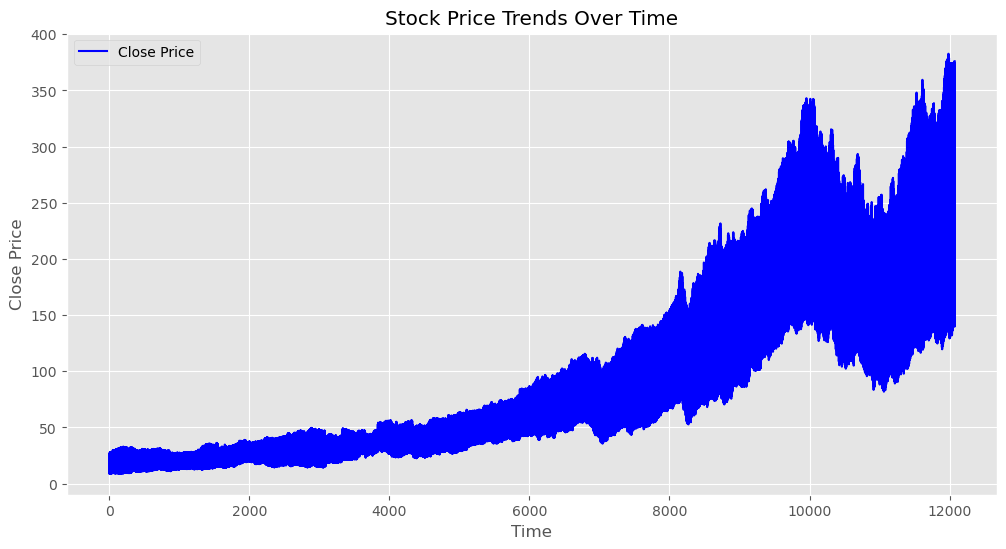

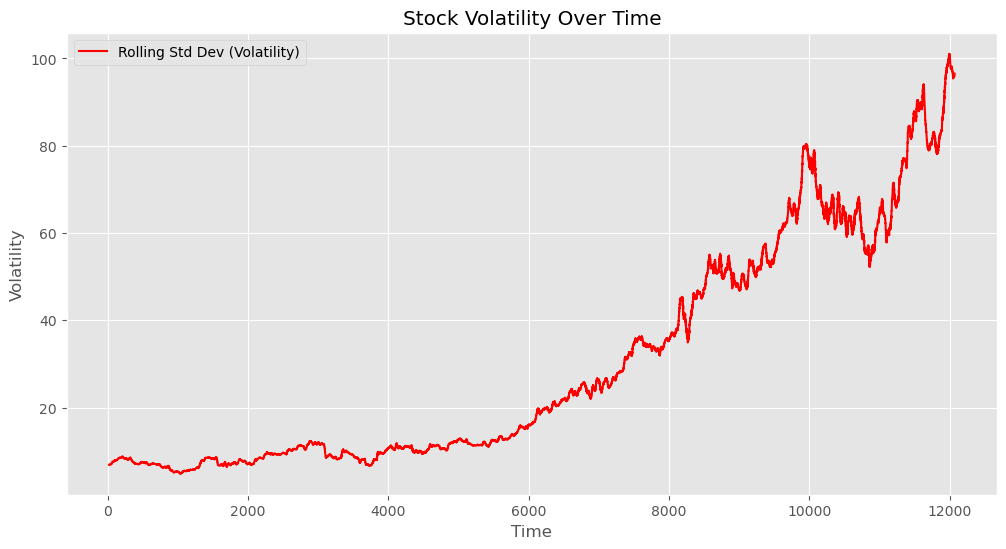

/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


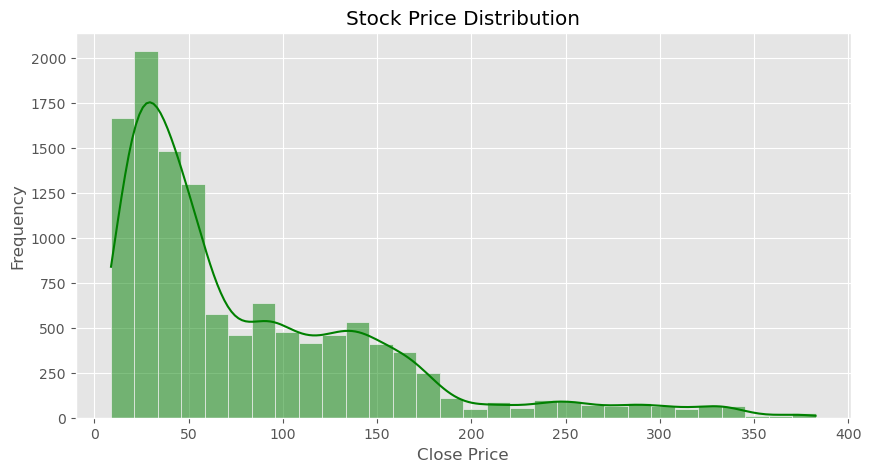

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Load the dataset (prioritize processed_sp500data.csv)
try:
    df = pd.read_csv("/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data.csv")
    print("Loaded processed_sp500data.csv")
except FileNotFoundError:
    print("processed_sp500data.csv not found, loading processed_features.csv instead")
    df = pd.read_csv("/users/hm4th/desktop/processed_features.csv")

# Display first few rows
display(df.head())

# List available columns
print("Available columns:", df.columns.tolist())

# Identify alternative names for 'Close' column
possible_close_columns = ['Close', 'Adj Close', 'Closing Price']
close_col = None
for col in possible_close_columns:
    if col in df.columns:
        close_col = col
        break

if close_col:
    df['Stock_Movement'] = (df[close_col].shift(-1) > df[close_col]).astype(int)
    
    # Ensure 'Performance Label' is numeric
    if 'Performance Label' in df.columns:
        df['Performance Label'] = df['Performance Label'].replace({"Underperform": 0, "Outperform": 1})
    
    # Compute RSI
    window_length = 14
    delta = df[close_col].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # Compute MACD
    short_window = 12
    long_window = 26
    df['MACD'] = df[close_col].ewm(span=short_window, adjust=False).mean() - df[close_col].ewm(span=long_window, adjust=False).mean()
    
    # Compute Moving Average
    df['Moving_Avg'] = df[close_col].rolling(window=20).mean()

    # Save the updated dataset
    df.to_csv("/users/hm4th/desktop/SP500-Prediction-ML/processed_features_updated.csv", index=False)

    # Stock Price Trends
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[close_col], label='Close Price', color='blue')
    plt.title("Stock Price Trends Over Time")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()

    # Volatility Analysis
    df['Volatility'] = df[close_col].rolling(window=20).std()
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volatility'], label='Rolling Std Dev (Volatility)', color='red')
    plt.title("Stock Volatility Over Time")
    plt.xlabel("Time")
    plt.ylabel("Volatility")
    plt.legend()
    plt.show()

    # Price Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df[close_col], bins=30, kde=True, color='green')
    plt.title("Stock Price Distribution")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Error: No suitable column found for 'Close' prices. Available columns:", df.columns.tolist())


In [22]:
import pandas as pd

# File paths
features_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_features.csv"
sp500_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data.csv"

# Load datasets
features_df = pd.read_csv(features_file)
sp500_df = pd.read_csv(sp500_file)

# Print column names
print("Columns in processed_features.csv:", features_df.columns.tolist())
print("Columns in processed_sp500data.csv:", sp500_df.columns.tolist())


Columns in processed_features.csv: ['DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'Forward P/E', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value Per Share', 'Cash Flow', 'Beta', 'Held by Insiders', 'Held by Institutions', 'Short Ratio', 'Short % of Float']
Columns in processed_sp500data.csv: ['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Price Change', 'SP500 Change', 'Performance Label']


In [23]:
# Ensure 'Symbol' and 'Date' exist in processed_sp500data.csv
if "Symbol" in sp500_df.columns and "Date" in sp500_df.columns:
    # Add Symbol and Date from sp500_df
    features_df["Symbol"] = sp500_df["Symbol"]
    features_df["Date"] = sp500_df["Date"]
else:
    raise ValueError("Error: 'Symbol' or 'Date' columns are missing from processed_sp500data.csv.")

# Reorder columns to place Symbol and Date first
column_order = ["Symbol", "Date"] + [col for col in features_df.columns if col not in ["Symbol", "Date"]]
features_df = features_df[column_order]

# Save the updated features file
updated_features_file = "/users/hm4th/desktop/SP500-Prediction-ML/processed_features_updated.csv"
features_df.to_csv(updated_features_file, index=False)
print(f"Updated features dataset saved to {updated_features_file}.")


Updated features dataset saved to /users/hm4th/desktop/SP500-Prediction-ML/processed_features_updated.csv.


In [24]:
# Reload the updated features dataset
features_df = pd.read_csv(updated_features_file)

# Merge datasets on 'Symbol' and 'Date'
merged_df = features_df.merge(sp500_df[['Symbol', 'Date', 'Performance Label']], on=['Symbol', 'Date'], how='left')

# Drop rows with missing Performance Label
merged_df = merged_df.dropna(subset=['Performance Label'])

# Convert Performance Label to numerical values
merged_df["Performance Label"] = merged_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0})

# Save the final merged dataset
final_file = "/users/hm4th/desktop/SP500-Prediction-ML/merged_processed_data.csv"
merged_df.to_csv(final_file, index=False)
print(f"Merged dataset saved to {final_file}.")


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/1719684601.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv(updated_features_file)


Merged dataset saved to /users/hm4th/desktop/SP500-Prediction-ML/merged_processed_data.csv.


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_49787/1719684601.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df["Performance Label"] = merged_df["Performance Label"].replace({"Outperform": 1, "Underperform": 0})


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the merged dataset
final_file = "/users/hm4th/desktop/SP500-Prediction-ML/merged_processed_data.csv"
df = pd.read_csv(final_file)

# Check dataset
print("Dataset Loaded:")
print(df.head())
print(f"Columns: {df.columns.tolist()}\n")


Dataset Loaded:
  Symbol                       Date    DE Ratio  Trailing P/E  Price/Sales  \
0   AAPL  2012-01-03 00:00:00+00:00  148.797565     34.108110     4.718622   
1   AMZN  2012-01-03 00:00:00+00:00  209.059000     36.641450     8.567374   
2  GOOGL  2012-01-03 00:00:00+00:00   37.589000     16.365183     5.261410   
3   MSFT  2012-01-03 00:00:00+00:00   12.243000      6.225503     2.069141   
4   AAPL  2012-01-04 00:00:00+00:00   14.127000     30.403524     3.492952   

   Price/Book  Profit Margin  Operating Margin  Return on Assets  \
0    8.830757       0.140401          0.209629          0.068141   
1   59.139900       0.239710          0.311710          0.214640   
2    5.449355       0.139920          0.187490          0.064880   
3    1.620715       0.338590          0.249470          0.048610   
4    8.010477       0.111940          0.145970          0.116270   

   Return on Equity  ...    Total Debt  Current Ratio  Book Value Per Share  \
0          0.300022  ...  2

In [26]:
# Define target variable
y = df["Performance Label"].astype(int)  # Convert to integer (1 = Outperform, 0 = Underperform)

# Define feature columns (exclude 'Symbol', 'Date', and 'Performance Label')
FEATURES = [col for col in df.columns if col not in ["Symbol", "Date", "Performance Label"]]

# Define features (X)
X = df[FEATURES]

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"Using {len(FEATURES)} features for prediction.")


Using 32 features for prediction.


In [27]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data: {X_train.shape[0]} samples")
print(f"Testing Data: {X_test.shape[0]} samples")


Training Data: 9657 samples
Testing Data: 2415 samples


In [28]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight="balanced")

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model training complete.")


Random Forest model training complete.


In [29]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.43

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.47      0.43      1117
           1       0.47      0.41      0.44      1298

    accuracy                           0.43      2415
   macro avg       0.44      0.44      0.43      2415
weighted avg       0.44      0.43      0.43      2415



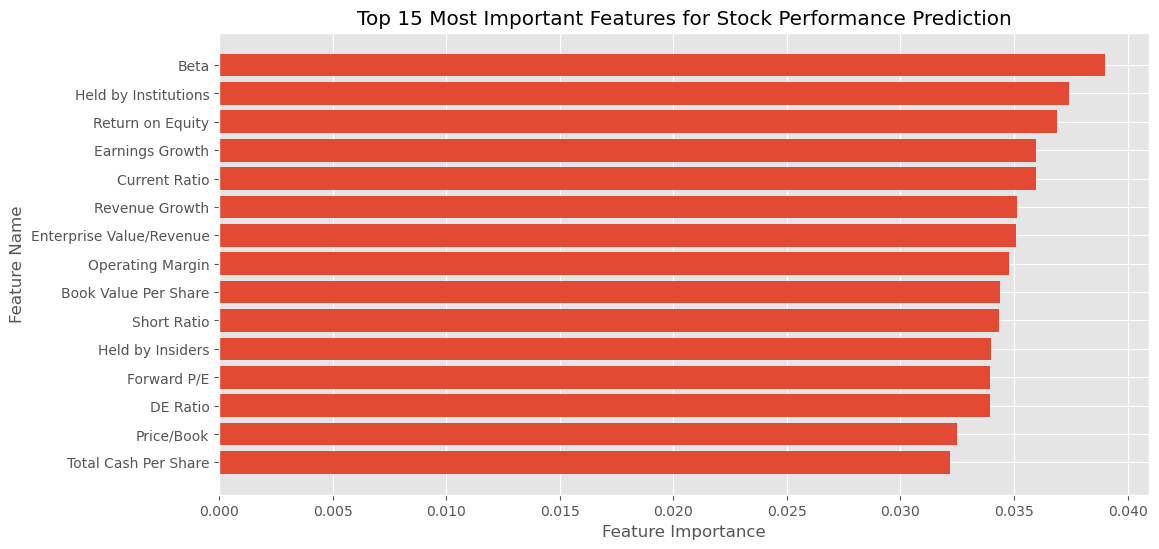

In [30]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = rf_model.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": FEATURES, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"][:15], feature_importance_df["Importance"][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 15 Most Important Features for Stock Performance Prediction")
plt.gca().invert_yaxis()
plt.show()
